In [6]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline

## 1. clicks_train.csv is the training set, showing which of a set of ads was clicked.

In [35]:
clicks_train = pd.read_csv('./data/clicks_train.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

In [33]:
clicks_test = pd.read_csv('./data/clicks_test.csv',  dtype={"display_id": int, "ad_id": int, "clicked": int})

## Most recommendations show 4 or 6 options

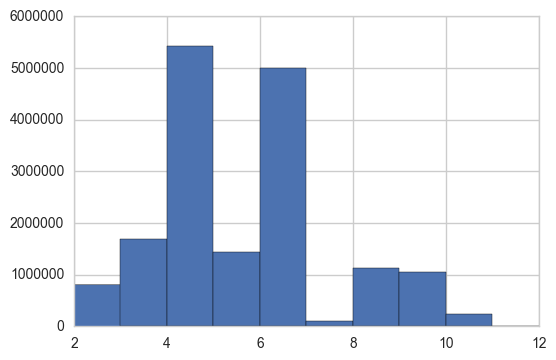

In [34]:
clicks_train['ad_id'].groupby(clicks_train['display_id']).size().hist()

## 2. events.csv provides information on the display_id context. It covers both the train and test set.

In [39]:
events_df = pd.read_csv('./data/events.csv',  dtype={"display_id": int, "uuid": str, "document_id": int, "timestamp": int, "platform": str, "geo_location": str})

In [36]:
timestamps = events_df.timestamp
## normalization to start of day
timestamps = ((((timestamps + 1465876799998)/1000)//(3600*24)) * 3600 * 24).apply(datetime.fromtimestamp)


## Events over the 15 day period

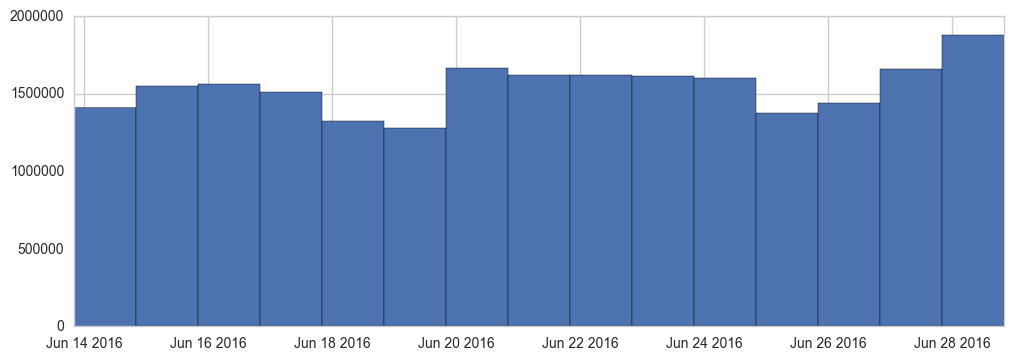

In [37]:
plt.figure(figsize=(12,4))
timestamps.hist(bins=15)

## Events over the day: Most ads clicked after 2:00 PM UTC (0 is 4:00 AM UTC)

In [38]:
## normalization to start of hour
timestamps_hrly = (events_df.timestamp // (3600 * 1000)) % 24


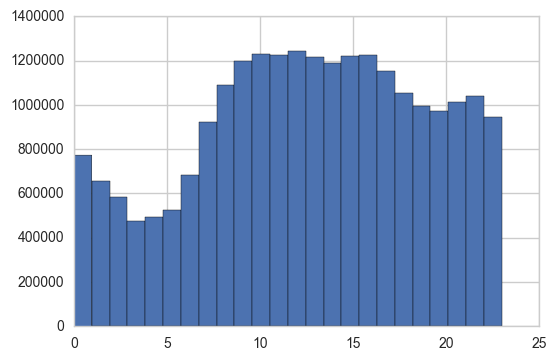

In [39]:
timestamps_hrly.hist(bins=24)

In [40]:
train = clicks_train.drop_duplicates(['display_id']).merge(events_df[['display_id', 'timestamp']])

In [41]:
test = clicks_test.drop_duplicates(['display_id'])

In [42]:
test = test.merge(events_df[['display_id', 'timestamp']])
test.head()

,display_id,ad_id,timestamp
0,16874594,66758,1026
1,16874595,8846,1094
2,16874596,11430,1546
3,16874597,137858,1571
4,16874598,67292,1759


## Test data and train data comparison

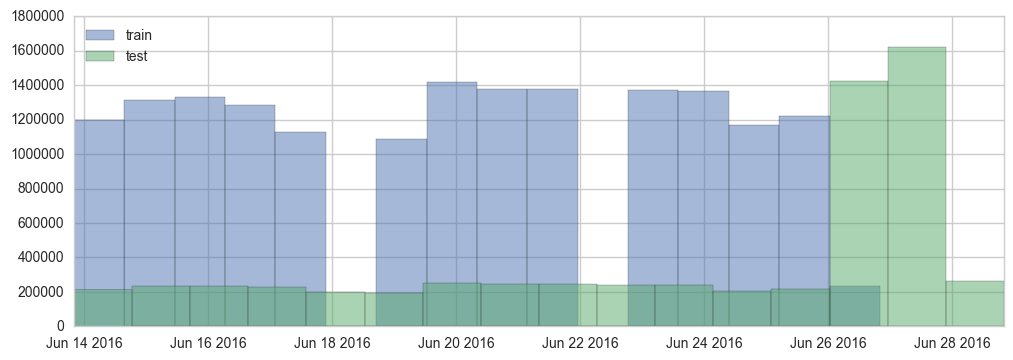

In [43]:
plt.figure(figsize=(12,4))
train_daily = ((((train.timestamp + 1465876799998)/1000)//(3600*24)) * 3600 * 24).apply(datetime.fromtimestamp)
test_daily = ((((test.timestamp + 1465876799998)/1000)//(3600*24)) * 3600 * 24).apply(datetime.fromtimestamp)
train_daily.hist(bins=16, label="train", alpha=0.5)
test_daily.hist(bins=16, label="test", alpha=0.5)
plt.legend(loc="best")


what does this mean: Additionally, the public/private sampling for the competition is uniformly random, not based on time. These sampling choices were intentional, in spite of the possibility that participants can look ahead in time?

Do we need to figure out what the current algorithm of selecting the related content is?

## documents_topics.csv, documents_entities.csv, and documents_categories.csv all provide information about the content in a document, as well as Outbrain's confidence in each respective relationship.

In [43]:
topics = pd.read_csv('./data/documents_topics.csv',  dtype={"document_id": int, "topic_id": int, "confidence_level": float})
categories = pd.read_csv('./data/documents_categories.csv',  dtype={"document_id": int, "category_id": int, "confidence_level": float})
entities = pd.read_csv('./data/documents_entities.csv',  dtype={"document_id": int, "entity_id": str, "confidence_level": float})

In [12]:
entities.head()

,document_id,entity_id,confidence_level
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865
1,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114
2,1524246,839907a972930b17b125eb0247898412,0.392096
3,1524246,04d8f9a1ad48f126d5806a9236872604,0.213996
4,1617787,612a1d17685a498aff4f036c1ee02c16,0.386193


No. of Unique topics, categories and entities

In [30]:
len(topics['topic_id'].unique())

300

In [29]:
len(categories['category_id'].unique())

97

In [23]:
len(entities['entity_id'].unique())

1326009

In [55]:
entities.shape

(5537552, 3)

In [50]:
events_df.shape

(23120126, 6)

In [51]:
entities_clk = pd.merge(entities, events_df[['display_id', 'document_id']], on=['document_id'], how='left')

In [52]:
entities_clk = entities_clk.shape

(50285458, 4)

In [61]:
entities_clk = entities_clk.merge(clicks_train[['display_id', 'clicked']])

In [62]:
entities_clk.shape

(171312569, 5)

## page_views.csv is a the log of users visiting documents. 

the page views log (page_views.csv) is over 2 billion rows and 100GB uncompressedthe page views log (page_views.csv) is over 2 billion rows and 100GB uncompressed
How to deal with this?

In [63]:
pvs= pd.read_csv('./data/page_views_sample.csv',  dtype={"uuid": str, "document_id": int, "timestamp": int, "platform": str, "geo_location": str, "traffic_source": str})

In [65]:
pvs.head(10)

,uuid,document_id,timestamp,platform,geo_location,traffic_source
0,1fd5f051fba643,120,31905835,1,RS,2
1,8557aa9004be3b,120,32053104,1,VN>44,2
2,c351b277a358f0,120,54013023,1,KR>12,1
3,8205775c5387f9,120,44196592,1,IN>16,2
4,9cb0ccd8458371,120,65817371,1,US>CA>807,2
5,2aa611f32875c7,120,71495491,1,CA>ON,2
6,f55a6eaf2b34ab,120,73309199,1,BR>27,2
7,cc01b582c8cbff,120,50033577,1,CA>BC,2
8,6c802978b8dd4d,120,66590306,1,CA>ON,2
9,f4e423314303ff,120,48314254,1,US>LA>622,1
